# Cat Breed Classification 🐈

In this project, I will develop a deep learning model (CNN model) using Tensorflow,Keras that can classify different breeds of cats based on their images.

## 1. Import Necessary Libraries

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img,ImageDataGenerator
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,BatchNormalization,Dropout,Flatten


## 2. Load the Dataset

### Fetch Images from Folders

In [4]:
dirs = os.listdir('cat-breeds-dataset/')

for dir in dirs:
    files = os.listdir('cat-breeds-dataset/' + dir)
    print(dir + ' folder has ' + str(len(files)) + ' images.')

British Shorthair folder has 311 images.
Siamese folder has 300 images.
Sphynx folder has 309 images.
Scottish Fold folder has 240 images.
Persian folder has 242 images.


### Load Images to Arrays from Dataset

In [5]:
main_dir = 'cat-breeds-dataset/'
IMAGE_SIZE = (224,224)
BATCH_SIZE = 32

In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory(directory=main_dir,
                                                       batch_size = BATCH_SIZE,
                                                       image_size = IMAGE_SIZE,
                                                       seed=42,
                                                       validation_split=0.2,
                                                       subset='training')

val_ds = tf.keras.utils.image_dataset_from_directory(directory=main_dir,
                                                     batch_size = BATCH_SIZE,
                                                     image_size = IMAGE_SIZE,
                                                     seed=42,
                                                     validation_split=0.2,
                                                     subset='validation')

Found 1402 files belonging to 5 classes.
Using 1122 files for training.
Found 1402 files belonging to 5 classes.
Using 280 files for validation.


In [7]:
cat_class_names = train_ds.class_names

In [8]:
cat_class_names

['British Shorthair', 'Persian', 'Scottish Fold', 'Siamese', 'Sphynx']

### Let's look at images

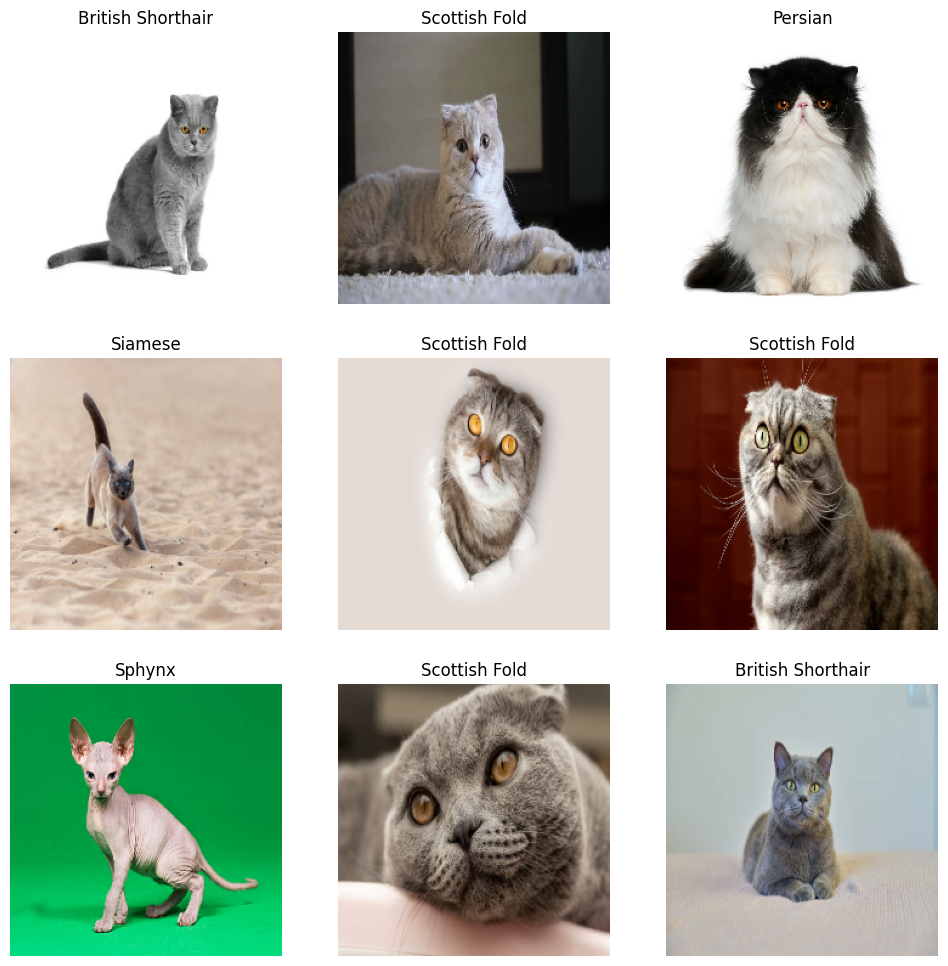

In [9]:
plt.figure(figsize=(12,12))

i = 0
for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(cat_class_names[labels[i]])
        plt.axis('off')


In [10]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


## 3. Data Augmentation

To increase the size of training dataset we will use data augmentation. It helps to reduce overfitting risks.

In [11]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2)
])

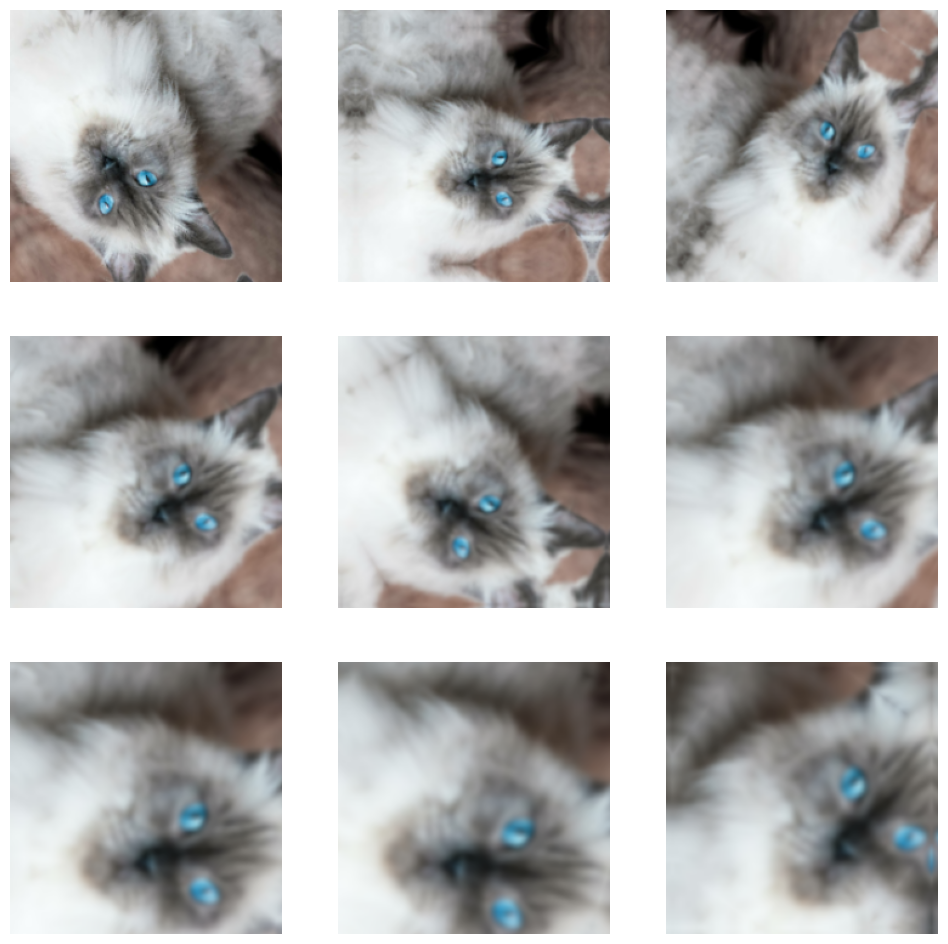

In [12]:
plt.figure(figsize=(12,12))

i = 0
for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3,i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

## 4. Model Generation




In [13]:
np.random.seed(42)

model = tf.keras.Sequential([
    data_augmentation,
    layers.Rescaling(1./255),

    Conv2D(filters=128, kernel_size=(3,3),activation='relu',input_shape = (224,224,3)),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(filters=256, kernel_size=(5,5),activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(filters=128, kernel_size=(3,3),activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(filters=64, kernel_size=(3,3),activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(filters=64, kernel_size=(3,3),activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(filters=32, kernel_size=(3,3),activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),


    Flatten(),

    Dense(256,activation='relu'),
    Dropout(0.2),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(5,activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              metrics=['accuracy'],
              loss='sparse_categorical_crossentropy')

In [15]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 224, 224, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (32, 224, 224, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 222, 222, 128)         │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (32, 222, 222, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 111, 111, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 107, 107, 256)         │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (32, 107, 107, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 53, 53, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 51, 51, 128)           │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (32, 51, 51, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 25, 25, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 23, 23, 64)            │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (32, 23, 23, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 11, 11, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 9, 9, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (32, 9, 9, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 4, 4, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (32, 2, 2, 32)              │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (32, 2, 2, 32)              │             1

 Total params: 1,299,877 (4.96 MB)

 Trainable params: 1,298,533 (4.95 MB)

 Non-trainable params: 1,344 (5.25 KB)

In [16]:
history = model.fit(train_ds, epochs=50, validation_data=val_ds, verbose=1)

Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.2180 - loss: 1.6787 - val_accuracy: 0.2107 - val_loss: 1.6073
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 15s 406ms/step - accuracy: 0.2655 - loss: 1.6064 - val_accuracy: 0.2107 - val_loss: 1.6090
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 15s 411ms/step - accuracy: 0.2841 - loss: 1.5754 - val_accuracy: 0.2286 - val_loss: 1.6133
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 15s 431ms/step - accuracy: 0.2918 - loss: 1.5561 - val_accuracy: 0.1964 - val_loss: 1.6202
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 15s 428ms/step - accuracy: 0.2957 - loss: 1.5601 - val_accuracy: 0.1679 - val_loss: 1.6452
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 15s 409ms/step - accuracy: 0.3239 - loss: 1.5224 - val_accuracy: 0.2036 - val_loss: 1.6415
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 15s 409ms/step - accuracy: 0.3335 - loss: 1.4891 - val_accuracy: 0.2071 - val_loss: 1.6309
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 15s 411ms/step - accuracy: 0.3650 - loss: 1.4686 - val_accurac

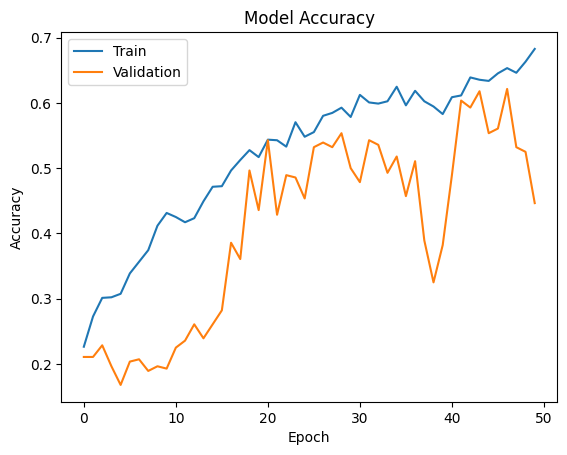

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

We can see that accuracy is not good enough and in some points there is sign of overfitting. To address these, we will use hyperparameter tuning.

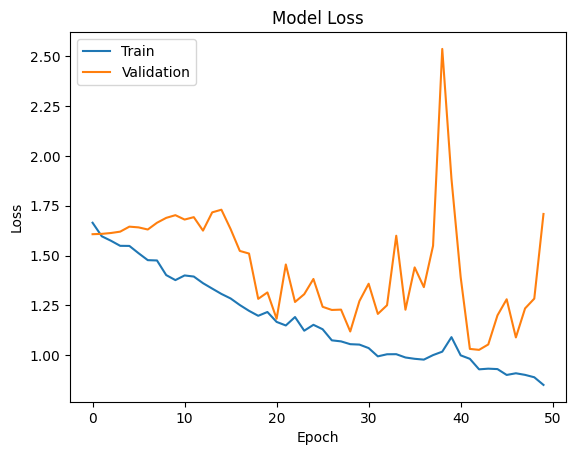

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Prediction

In [19]:
def classify_images(image_path,model):
    input_image = tf.keras.utils.load_img(image_path, target_size=(224, 224))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array, 0)

    # Make a prediction
    prediction = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(prediction[0])

    predicted_label = cat_class_names[np.argmax(result)]
    confidence_score = np.max(result) * 100

    # Display image with prediction
    plt.figure(figsize=(5, 5))
    plt.imshow(input_image)
    plt.title(f"Predicted: {predicted_label} ({confidence_score:.2f}%)", fontsize=14)
    plt.axis('off')
    plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step


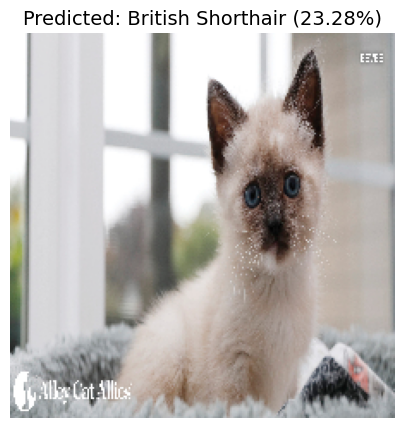

In [20]:
classify_images('test_images\cat.jpg',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


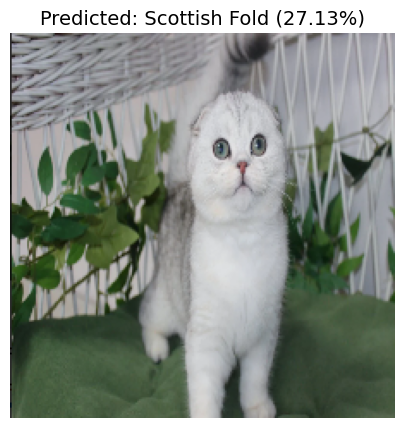

In [21]:
classify_images('test_images\Cat2.png',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


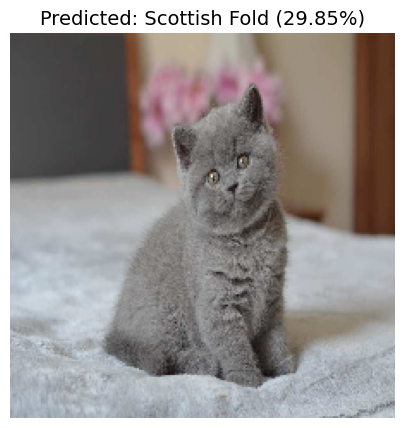

In [22]:
classify_images('test_images\cat3.jpg',model)

## 5.Hyperparameter tuning

As the model's accuracy is low and we can see there is overfitting, we will implement hyperparameter tuning to improve accuracy and reduce overfitting.

In [24]:
import keras_tuner as kt

np.random.seed(42)

def build_model(hp):
    model = Sequential()

    # First Convolutional Layer
    model.add(layers.Conv2D(
        filters=hp.Int('filters_1', min_value=32, max_value=256, step=32),
        kernel_size=hp.Choice('kernel_size_1', values=[3, 5]),
        activation='relu',
        input_shape=(224, 224, 3)
    ))
    model.add(layers.MaxPooling2D(pool_size=2))
    model.add(layers.BatchNormalization())

    # Second Convolutional Layer
    model.add(layers.Conv2D(
        filters=hp.Int('filters_2', min_value=32, max_value=256, step=32),
        kernel_size=hp.Choice('kernel_size_2', values=[3, 5]),
        activation='relu'
    ))
    model.add(layers.MaxPooling2D(pool_size=2))
    model.add(layers.BatchNormalization())

    model.add(layers.Flatten())

    model.add(layers.Dense(
        units=hp.Int('dense_units', min_value=32, max_value=256, step=32),
        activation='relu'
    ))
    model.add(layers.Dropout(hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(layers.Dense(5, activation='softmax'))


    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            learning_rate=hp.Choice('learning_rate', values=[0.01, 0.001, 0.0001, 0.00001])
        ),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Hyperparameter Tuning

tuner = kt.BayesianOptimization(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='hyperparameter_tuning',
    project_name='cnn_tuning'
)


tuner.search(train_ds, epochs=15, validation_data=val_ds)

# Get Best Hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best hyperparameters: "
      f"Filters_1={best_hps.get('filters_1')}, "
      f"Kernel Size_1={best_hps.get('kernel_size_1')}, "
      f"Filters_2={best_hps.get('filters_2')}, "
      f"Kernel Size_2={best_hps.get('kernel_size_2')}, "
      f"Dense Units={best_hps.get('dense_units')}, "
      f"Dropout={best_hps.get('dropout')}, "
      f"Learning Rate={best_hps.get('learning_rate')}")


best_model = tuner.hypermodel.build(best_hps)
best_model.fit(train_ds, epochs=15, validation_data=val_ds)


Trial 5 Complete [00h 01m 18s]
val_accuracy: 0.2964285612106323

Best val_accuracy So Far: 0.550000011920929
Total elapsed time: 00h 14m 04s
Best hyperparameters: Filters_1=32, Kernel Size_1=3, Filters_2=224, Kernel Size_2=5, Dense Units=128, Dropout=0.2, Learning Rate=0.0001
Epoch 1/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 11s 195ms/step - accuracy: 0.2444 - loss: 15.0088 - val_accuracy: 0.2536 - val_loss: 46.3875
Epoch 2/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.5642 - loss: 3.6731 - val_accuracy: 0.2714 - val_loss: 15.2510
Epoch 3/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - accuracy: 0.6773 - loss: 1.2310 - val_accuracy: 0.2357 - val_loss: 21.4675
Epoch 4/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - accuracy: 0.7317 - loss: 1.1679 - val_accuracy: 0.3143 - val_loss: 7.4145
Epoch 5/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.8024 - loss: 0.8190 - val_accuracy: 0.3714 - val_loss: 5.1635
Epoch 6/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - accuracy: 0.8263 - loss:

Unlike the previous model, there is high accuracy here.But validation accuracy is very low in contrast to training accuracy, it means that there is overfitting again. To handle this we will use transfer learning method.

### Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


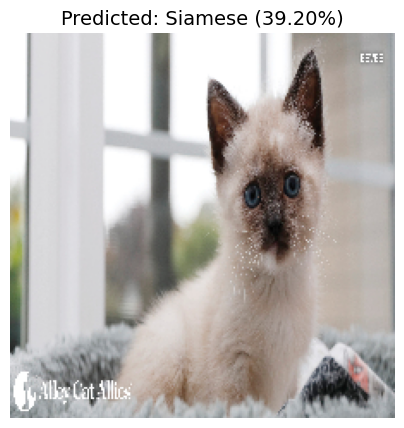

In [25]:
classify_images('test_images\cat.jpg',best_model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


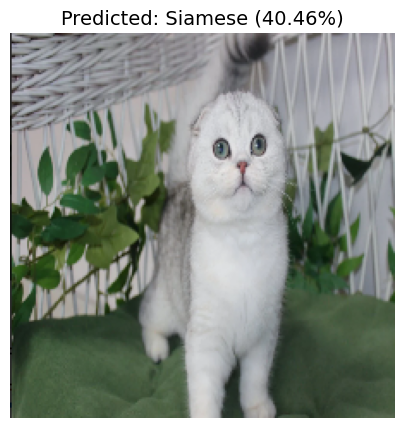

In [26]:
classify_images('test_images\Cat2.png',best_model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


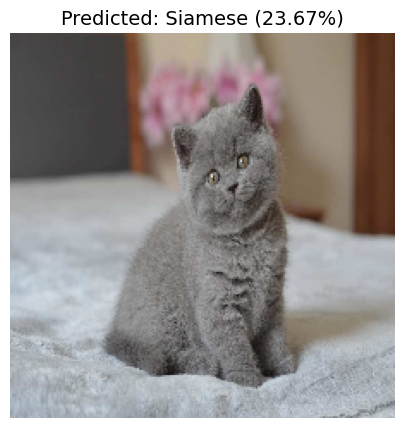

In [27]:
classify_images('test_images\cat3.jpg',best_model)

## 6.Transfer Learning

Transfer learning allows us to use a pretrained model (EfficientNetB0) trained on ImageNet.
This helps in faster training and better accuracy, as the model has already learned useful features.
Instead of training a model from scratch, we leverage these learned patterns and fine-tune them for our task.
We freeze its weights to retain the learned features and add custom layers for classification.


In [28]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

np.random.seed(42)

base_model = EfficientNetB0(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    BatchNormalization(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])


optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    callbacks=[early_stopping]
)


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 54s 721ms/step - accuracy: 0.4345 - loss: 2.2220 - val_accuracy: 0.9321 - val_loss: 0.1806
Epoch 2/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 0.8351 - loss: 0.6047 - val_accuracy: 0.9571 - val_loss: 0.1294
Epoch 3/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.8988 - loss: 0.3117 - val_accuracy: 0.9536 - val_loss: 0.1291
Epoch 4/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9169 - loss: 0.2626 - val_accuracy: 0.9500 - val_loss: 0.1414
Epoch 5/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9260 - loss: 0.2715 - val_accuracy: 0.9429 - val_loss: 0.1651
Epoch 6/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.9488 - loss: 0.2228 - val_accuracy: 0.9464 - val_loss: 0.1974
Epoch 7/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9262 - loss: 0.4440 - val_accuracy: 0.9500 - val_loss: 0.1961
Epoch 8/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accur

**It gives good result in both training and validation dataset. So we can use it for further processing.**

### Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


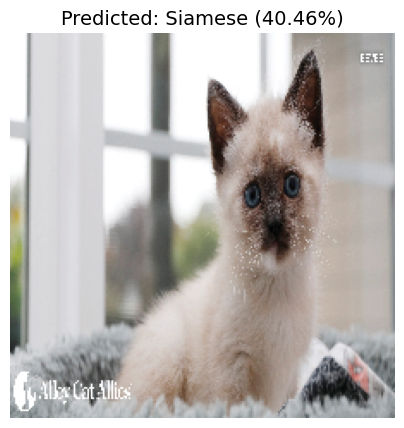

In [29]:
classify_images('test_images\cat.jpg',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


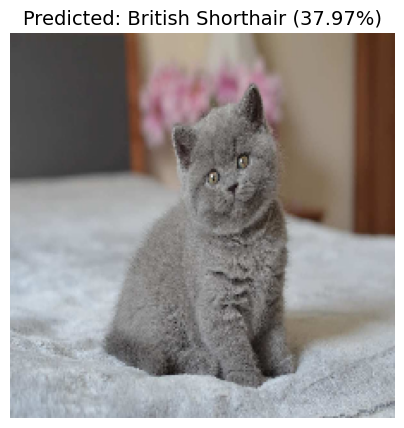

In [30]:
classify_images('test_images\cat3.jpg',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


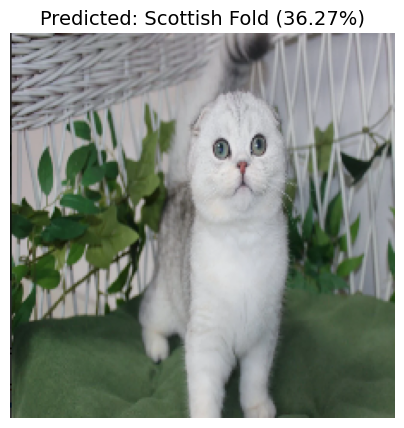

In [31]:
classify_images('test_images\Cat2.png',model)

## 7. Save the Model

In [32]:
model.save('cat_breed_model.keras')